# FORMULA 1 - ANÁLISIS TEMPORADA 2022

###### Created by Mario Crespo

## Bienvenidos al análisis de datos de la temporada de Formula 1 2022

 
Como siempre, empezamos importando las bibliotecas necesarias y leyendo todos los conjuntos de datos correspondientes cuidadosamente elaborados a continuación. Además, hay una función de ayuda que asigna adecuadamente los colores a pilotos y equipos, especialmente útil para las visualizaciones de datos.

In [53]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: folium in c:\users\marie\appdata\local\programs\python\python312\lib\site-packages (0.18.0)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import math
import warnings
import folium
warnings.filterwarnings('ignore')
from datetime import timedelta
%matplotlib inline
font_manager.fontManager.addfont('C:\\Users\\marie\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Formula1-Regular.otf')

In [55]:
season2022RaceCalendar = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\Formula1_2022season_calendar.csv')
season2022RaceCalendar.set_index('Round', inplace=True)
season2022Drivers = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\Formula1_2022season_drivers.csv')
season2022Drivers.set_index('Abbreviation', inplace=True)
season2022Teams = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\Formula1_2022season_teams.csv')
season2022Teams.index = range(1,11)
season2022QualifyingResults = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\Formula1_2022season_qualifyingResults.csv')
season2022SprintRaceResults = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\Formula1_2022season_sprintRaceResults.csv')
season2022RaceResults = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\formula1_2022season_raceResults.csv')
season2022DotdVotes = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\formula1_2022season_driverOfTheDayVotes.csv')
season2022DotdVotes.set_index('Track', inplace=True)

In [56]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['ALFA','BOT','ZHO']:           cl.append('#900000')
        elif abbr in ['HAAS','SCH','MAG']:         cl.append('#ffffff')
        elif abbr in ['ASTO','VET','STR','HUL']:   cl.append('#006f62')
        elif abbr in ['WILL','ALB','LAT','DE']:    cl.append('#0072ff')
        elif abbr in ['ALPH','GAS','TSU']:         cl.append('#2b5962')
        elif abbr in ['MCLA','RIC','NOR']:         cl.append('#ff8700')
        elif abbr in ['RED ','VER','PER']:         cl.append('#0600f0')
        elif abbr in ['FERR','LEC','SAI']:         cl.append('#cb0000')
        elif abbr in ['MERC','HAM','RUS']:         cl.append('#00d2bd')
        elif abbr in ['ALPI','ALO','OCO']:         cl.append('#0090ff')
    return cl

 
## Calendario de carreras
El calendario de carreras de la temporada 2022 estaba compuesto por **22 carreras**, a través de **4 continentes** y **20 países**...


In [57]:
season2022RaceCalendar

,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,20/03/2022,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,27/03/2022,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.774,Lewis Hamilton,2021,27,3
3,10/04/2022,Heineken Australian GP,Australia,Melbourne,Albert Park Circuit,1996,58,5.278,306.124,1:20.260,Charles Leclerc,2022,14,2
4,24/04/2022,Rolex Gran Premio Del Made in Italy e Dell'Emi...,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,18,1
5,08/05/2022,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:31.361,Max Verstappen,2022,19,3
6,22/05/2022,Pirelli Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.675,308.424,1:18.149,Max Verstappen,2021,16,2
7,29/05/2022,Grand Prix de Monaco,Monaco,Monte Carlo,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
8,12/06/2022,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
9,19/06/2022,AWS Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2019,14,3


### Mapa de los circuitos

In [58]:
# Lista de circuitos de F1 2022 (nombre, latitud, longitud)
circuits = [
    {"name": "Bahrain International Circuit", "location": [26.0325, 50.5106]},
    {"name": "Jeddah Corniche Circuit", "location": [21.6319, 39.1043]},
    {"name": "Albert Park Circuit", "location": [-37.8497, 144.968]},
    {"name": "Imola (Autodromo Enzo e Dino Ferrari)", "location": [44.3439, 11.7167]},
    {"name": "Miami International Autodrome", "location": [25.958, -80.2389]},
    {"name": "Circuit de Barcelona-Catalunya", "location": [41.57, 2.2611]},
    {"name": "Circuit de Monaco", "location": [43.7347, 7.4206]},
    {"name": "Baku City Circuit", "location": [40.3725, 49.8533]},
    {"name": "Circuit Gilles Villeneuve", "location": [45.5048, -73.5262]},
    {"name": "Silverstone Circuit", "location": [52.0733, -1.0142]},
    {"name": "Red Bull Ring", "location": [47.2197, 14.7647]},
    {"name": "Circuit Paul Ricard", "location": [43.2508, 5.7914]},
    {"name": "Hungaroring", "location": [47.5789, 19.2486]},
    {"name": "Circuit de Spa-Francorchamps", "location": [50.4372, 5.9714]},
    {"name": "Zandvoort Circuit", "location": [52.3888, 4.5401]},
    {"name": "Monza (Autodromo Nazionale Monza)", "location": [45.6156, 9.2811]},
    {"name": "Marina Bay Street Circuit", "location": [1.2914, 103.864]},
    {"name": "Suzuka International Racing Course", "location": [34.8431, 136.541]},
    {"name": "Circuit of the Americas", "location": [30.1328, -97.6411]},
    {"name": "Autódromo Hermanos Rodríguez", "location": [19.4042, -99.0907]},
    {"name": "Interlagos (Autódromo José Carlos Pace)", "location": [-23.7036, -46.6997]},
    {"name": "Yas Marina Circuit", "location": [24.4672, 54.6031]}
]

# Crear el mapa centrado
mapa = folium.Map(location=[20, 0], zoom_start=2)

# Añadir los marcadores al mapa
for circuit in circuits:
    folium.Marker(
        location=circuit["location"],
        popup=circuit["name"],
        tooltip="Clic para más info"
    ).add_to(mapa)

# Mostrar el mapa
mapa

mapa.save('mapa.html')


 
## Equipos
Al igual que en temporadas anteriores, un total de **10 equipos** compitieron en la parrilla para ser el mejor constructor en la Temporada 2022...
(los números de las columnas de la derecha reflejan los resultados tras la finalización de la temporada 2022)


In [59]:
season2022Teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB18,Red Bull Powertrains,1997,5,1(x92),81,84
2,Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualtieri,F1-75,Ferrari,1950,16,1(x243),242,258
3,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,Mike Elliott,W13,Mercedes,1970,8,1(x116),128,91
4,Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Otmar Szafneuer,Pat Fry,A522,Renault,1986,2,1(x21),20,15
5,McLaren,McLaren F1 Team,"Woking, United Kingdom",Andreas Seidl,James Key,MCL36,Mercedes,1966,8,1(x183),156,162
6,Alfa Romeo,Alfa Romeo F1 Team ORLEN,"Hinwil, Switzerland",Frédéric Vasseur,Jan Monchaux,C42,Ferrari,1993,0,1(x1),1,6
7,Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Crack,Andrew Green,AMR22,Mercedes,2018,0,1(x1),1,0
8,Haas,Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-22,Ferrari,2016,0,4(x1),1,2
9,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT03,Red Bull Powertrains,1985,0,1(x2),1,2
10,Williams,Williams Racing,"Grove, United Kingdom",Jost Capito,François-Xavier Demaison,FW44,Mercedes,1978,9,1(x114),128,133


## Pilotos

Junto con el número de equipos, un total de **20 pilotos** (más 2 pilotos reserva) estaban en la parrilla del campeonato del mundo en la Temporada 2022...
(los números en las columnas correspondientes reflejan los resultados después del final de la temporada 2022)


In [60]:
season2022Drivers_ordenado = season2022Drivers.sort_values(by="Team")
season2022Drivers_ordenado

,Driver,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
ZHO,Guanyu Zhou,24,Alfa Romeo,China,0,6.0,22,0,8(x1),9,30/05/1999,"Shanghai, China"
BOT,Valtteri Bottas,77,Alfa Romeo,Finland,67,1787.0,200,0,1(x10),1,28/08/1989,"Nastola, Finland"
TSU,Yuki Tsunoda,22,AlphaTauri,Japan,0,44.0,44,0,4(x1),7,11/05/2000,"Sagamihara, Japan"
GAS,Pierre Gasly,10,AlphaTauri,France,3,332.0,108,0,1(x1),2,07/02/1996,"Rouen, France"
OCO,Esteban Ocon,31,Alpine,France,2,364.0,111,0,1(x1),3,17/09/1996,"Evreux, Normandy"
ALO,Fernando Alonso,14,Alpine,Spain,98,2061.0,358,2,1(x32),1,29/07/1981,"Oviedo, Spain"
HUL,Nico Hulkenberg,27,Aston Martin,Germany,0,521.0,184,0,4(x3),1,19/08/1987,"Emmerich am Rhein, Germany"
STR,Lance Stroll,18,Aston Martin,Canada,3,194.0,122,0,3(x3),1,29/10/1998,"Montreal, Canada"
VET,Sebastian Vettel,5,Aston Martin,Germany,122,3098.0,300,4,1(x53),1,03/07/1987,"Heppenheim, Germany"


 
## Carreras destacadas
Dentro de la larga Temporada 2022 de 22 carreras, hubo algunos fines de semana de carreras que destacaron más que otros. Aquí, he elegido cinco de ellos incluyendo sus 10 mejores resultados de carrera...


### Gulf Air Bahrain Grand Prix 2022

In [61]:
season2022RaceResults[season2022RaceResults['Track'] == 'Bahrain'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570
2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,1:35.740
3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,1:36.228
4,63,George Russell,Mercedes,9,57,+11.211,12,No,1:36.302
5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,1:36.623
6,77,Valtteri Bottas,Alfa Romeo Ferrari,6,57,+16.119,8,No,1:36.599
7,31,Esteban Ocon,Alpine Renault,11,57,+19.423,6,No,1:37.110
8,22,Yuki Tsunoda,AlphaTauri RBPT,16,57,+20.386,4,No,1:37.104
9,14,Fernando Alonso,Alpine Renault,8,57,+22.390,2,No,1:36.733


### Crypto.com Miami GP

In [62]:
season2022RaceResults[season2022RaceResults['Track'] == 'Miami'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,3,57,1:34:24.258,26,Yes,1:31.361
2,16,Charles Leclerc,Ferrari,1,57,+3.786,18,No,1:31.488
3,55,Carlos Sainz,Ferrari,2,57,+8.229,15,No,1:31.790
4,11,Sergio Perez,Red Bull Racing RBPT,4,57,+10.638,12,No,1:31.819
5,63,George Russell,Mercedes,12,57,+18.582,10,No,1:32.195
6,44,Lewis Hamilton,Mercedes,6,57,+21.368,8,No,1:32.941
7,77,Valtteri Bottas,Alfa Romeo Ferrari,5,57,+25.073,6,No,1:33.184
8,31,Esteban Ocon,Alpine Renault,20,57,+28.386,4,No,1:33.163
9,23,Alexander Albon,Williams Mercedes,18,57,+32.365,2,No,1:33.447


### Grand Prix de Monaco

In [63]:
season2022RaceResults[season2022RaceResults['Track'] == 'Monaco'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing RBPT,3,64,1:56:30.265,25,No,1:16.028
2,55,Carlos Sainz,Ferrari,2,64,+1.154,18,No,1:16.421
3,1,Max Verstappen,Red Bull Racing RBPT,4,64,+1.491,15,No,1:16.052
4,16,Charles Leclerc,Ferrari,1,64,+2.922,12,No,1:16.249
5,63,George Russell,Mercedes,6,64,+11.968,10,No,1:16.830
6,4,Lando Norris,McLaren Mercedes,5,64,+12.231,9,Yes,1:14.693
7,14,Fernando Alonso,Alpine Renault,7,64,+46.358,6,No,1:15.882
8,44,Lewis Hamilton,Mercedes,8,64,+50.388,4,No,1:17.203
9,77,Valtteri Bottas,Alfa Romeo Ferrari,12,64,+52.525,2,No,1:17.600


### Honda Japanese GP

In [64]:
season2022RaceResults[season2022RaceResults['Track'] == 'Japan'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,1,28,3:01:44.004,25,No,1:44.911
2,11,Sergio Perez,Red Bull Racing RBPT,4,28,+27.066,18,No,1:46.120
3,16,Charles Leclerc,Ferrari,2,28,+31.763,15,No,1:44.489
4,31,Esteban Ocon,Alpine Renault,5,28,+39.685,12,No,1:46.559
5,44,Lewis Hamilton,Mercedes,6,28,+40.326,10,No,1:45.530
6,5,Sebastian Vettel,Aston Martin Aramco Mercedes,9,28,+46.358,8,No,1:46.964
7,14,Fernando Alonso,Alpine Renault,7,28,+46.369,6,No,1:44.412
8,63,George Russell,Mercedes,8,28,+47.661,4,No,1:47.004
9,6,Nicholas Latifi,Williams Mercedes,19,28,+70.143,2,No,1:48.371


### Heineken Gran Prêmio de São Paulo

In [65]:
season2022RaceResults[season2022RaceResults['Track'] == 'Brazil'].drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,63,George Russell,Mercedes,1,71,1:38:34.044,26,Yes,1:13.785
2,44,Lewis Hamilton,Mercedes,2,71,+1.529,18,No,1:13.942
3,55,Carlos Sainz,Ferrari,7,71,+4.051,15,No,1:13.953
4,16,Charles Leclerc,Ferrari,5,71,+8.441,12,No,1:14.253
5,14,Fernando Alonso,Alpine Renault,17,71,+9.561,10,No,1:14.164
6,1,Max Verstappen,Red Bull Racing RBPT,3,71,+10.056,8,No,1:14.195
7,11,Sergio Perez,Red Bull Racing RBPT,4,71,+14.080,6,No,1:14.283
8,31,Esteban Ocon,Alpine Renault,16,71,+18.690,4,No,1:15.093
9,77,Valtteri Bottas,Alfa Romeo Ferrari,14,71,+22.552,2,No,1:15.511


## Carreras al sprint

### Emilia Romagna (Imola)

In [66]:
season2022SprintRaceResults[season2022SprintRaceResults['Track'] == 'Emilia Romagna'] \
    .drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,1,21,30:39.567,8
2,16,Charles Leclerc,Ferrari,2,21,+2.975,7
3,11,Sergio Perez,Red Bull Racing RBPT,7,21,+4.721,6
4,55,Carlos Sainz,Ferrari,10,21,+17.578,5
5,4,Lando Norris,McLaren Mercedes,3,21,+24.561,4
6,3,Daniel Ricciardo,McLaren Mercedes,6,21,+27.740,3
7,77,Valtteri Bottas,Alfa Romeo Ferrari,8,21,+28.133,2
8,20,Kevin Magnussen,Haas Ferrari,4,21,+30.712,1
9,14,Fernando Alonso,Alpine Renault,5,21,+32.278,0


### Austria

In [67]:
season2022SprintRaceResults[season2022SprintRaceResults['Track'] == 'Austria'] \
    .drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing RBPT,1,23,26:30.059,8
2,16,Charles Leclerc,Ferrari,2,23,+1.675,7
3,55,Carlos Sainz,Ferrari,3,23,+5.644,6
4,63,George Russell,Mercedes,4,23,+13.429,5
5,11,Sergio Perez,Red Bull Racing RBPT,13,23,+18.302,4
6,31,Esteban Ocon,Alpine Renault,5,23,+31.032,3
7,20,Kevin Magnussen,Haas Ferrari,6,23,+34.539,2
8,44,Lewis Hamilton,Mercedes,9,23,+35.447,1
9,47,Mick Schumacher,Haas Ferrari,7,23,+37.163,0


### Brasil

In [68]:
season2022SprintRaceResults[season2022SprintRaceResults['Track'] == 'Brazil'] \
    .drop('Track', axis=1).set_index('Position').head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,63,George Russell,Mercedes,3,24,30:11.307,8
2,55,Carlos Sainz,Ferrari,5,24,+3.995,7
3,44,Lewis Hamilton,Mercedes,8,24,+4.492,6
4,1,Max Verstappen,Red Bull Racing RBPT,2,24,+10.494,5
5,11,Sergio Perez,Red Bull Racing RBPT,9,24,+11.855,4
6,16,Charles Leclerc,Ferrari,10,24,+13.133,3
7,4,Lando Norris,McLaren Mercedes,4,24,+25.624,2
8,20,Kevin Magnussen,Haas Ferrari,1,24,+28.768,1
9,5,Sebastian Vettel,Aston Martin Aramco Mercedes,13,24,+30.218,0


## Mundial de pilotos


In [69]:
racePoints = season2022RaceResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintRacePoints = season2022SprintRaceResults.groupby(['Driver'])['Points'].sum().sort_values(ascending=False)
for driver in season2022RaceResults['Driver'].unique():
    if driver not in season2022SprintRaceResults['Driver'].unique():
        sprintRacePoints.loc[driver] = 0
driverStandings = (racePoints + sprintRacePoints).fillna(0).sort_values(ascending=False)
driverStandings = pd.DataFrame(driverStandings).reset_index()
driverStandings['POS'] = range(1,23)
driverStandings['Points'] = driverStandings['Points'].astype(int)
driverStandings.set_index('POS', inplace=True)
driverStandings

,Driver,Team,Points
POS,,,
1,Max Verstappen,Red Bull Racing RBPT,454
2,Charles Leclerc,Ferrari,308
3,Sergio Perez,Red Bull Racing RBPT,305
4,George Russell,Mercedes,275
5,Carlos Sainz,Ferrari,246
6,Lewis Hamilton,Mercedes,240
7,Lando Norris,McLaren Mercedes,122
8,Esteban Ocon,Alpine Renault,92
9,Fernando Alonso,Alpine Renault,81


### Progresión de los puntos del Top 10 a lo largo de la temporada

In [70]:
driverStandingsTop10 = driverStandings['Driver'][:10].values
driverPointsTop10 = {};  driverPointsTop10Sprint = {}
for driver in driverStandingsTop10:
    driverPointsTop10[driver] = season2022RaceResults[season2022RaceResults['Driver'] == driver]['Points'].values
    driverPointsTop10Sprint[driver] = season2022SprintRaceResults[season2022SprintRaceResults['Driver'] == driver] \
        ['Points'].values
sp = [3, 10, 20]
for driver in driverStandingsTop10:
    for i in range(len(sp)):
        driverPointsTop10[driver][sp[i]] = driverPointsTop10[driver][sp[i]] + driverPointsTop10Sprint[driver][i]

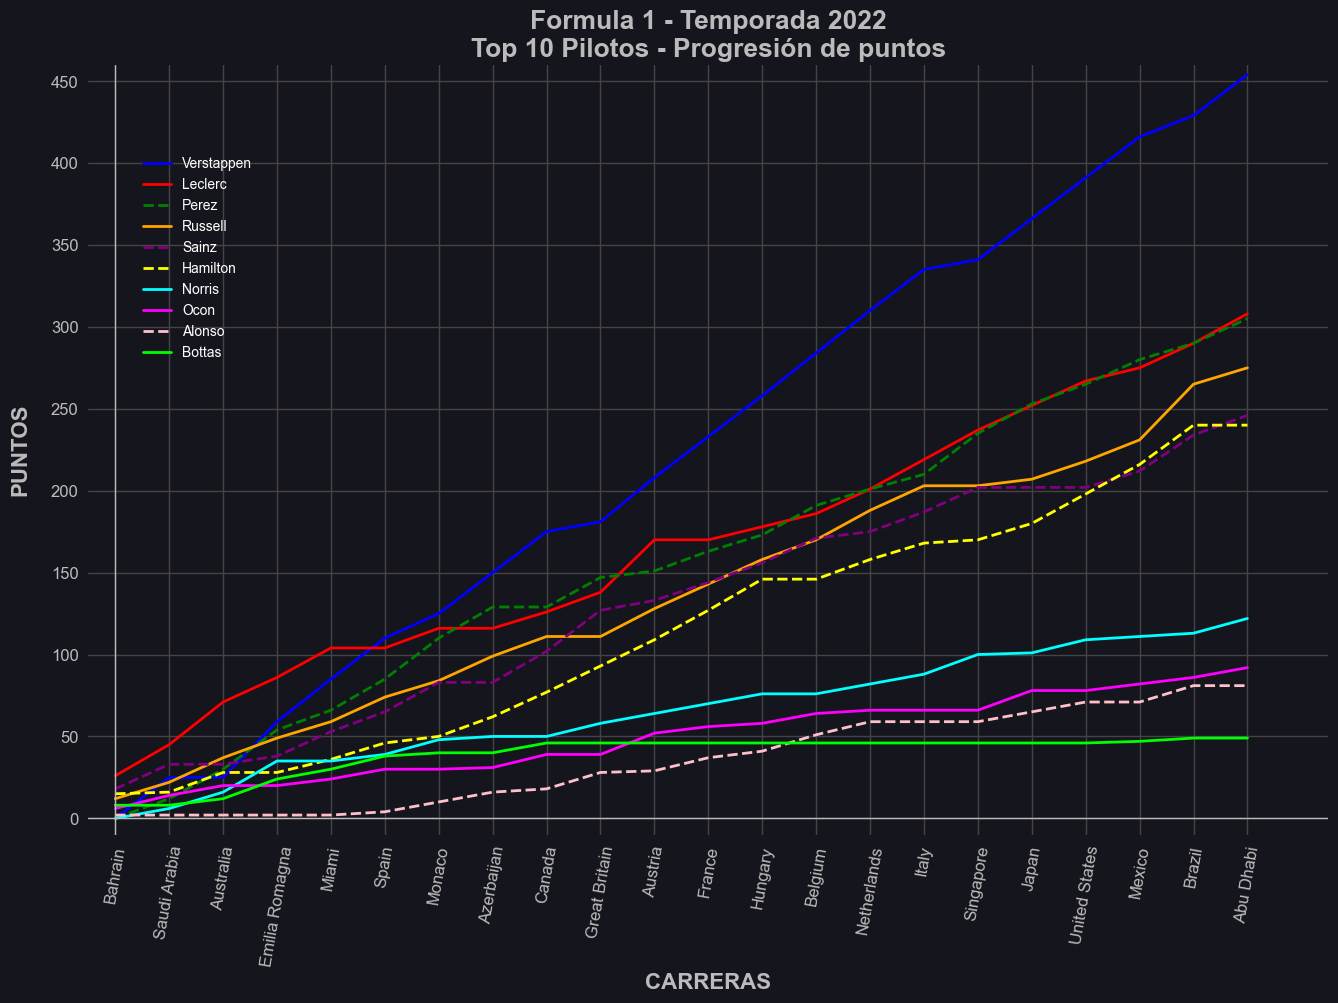

In [71]:
tracks = season2022RaceResults['Track'].unique()
tracksSprint = season2022SprintRaceResults['Track'].unique()

plt.style.use('seaborn-v0_8')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
plt.rcParams['font.family'] = 'sans-serif'  # Temporalmente para evitar problemas

plt.figure(figsize=(16, 10))
plt.axis([-0.5, len(tracks) + 0.5, -10, 460])  # Ajuste según la longitud de 'tracks'

c = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'pink', 'lime']  # Colores provisionales
for i in range(10):
    ls = '--' if driverStandingsTop10[i] in ['Sergio Perez', 'Carlos Sainz', 'Lewis Hamilton', 'Fernando Alonso'] else '-'
    plt.plot(driverPointsTop10[driverStandingsTop10[i]].cumsum(), label=driverStandingsTop10[i].split()[1], 
             c=c[i % len(c)], linewidth=2, ls=ls)

plt.title('Formula 1 - Temporada 2022\nTop 10 Pilotos - Progresión de puntos', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('CARRERAS', fontsize=16, fontweight='bold', color='#bbbbbb')
plt.ylabel('PUNTOS', fontsize=16, fontweight='bold', color='#bbbbbb', labelpad=15)
plt.xticks(range(0, len(tracks)), tracks, rotation=80, fontsize=12, color='#bbbbbb')
plt.yticks(range(0, 460, 50), range(0, 460, 50), fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04, 0.61), fontsize=10)
plt.show()


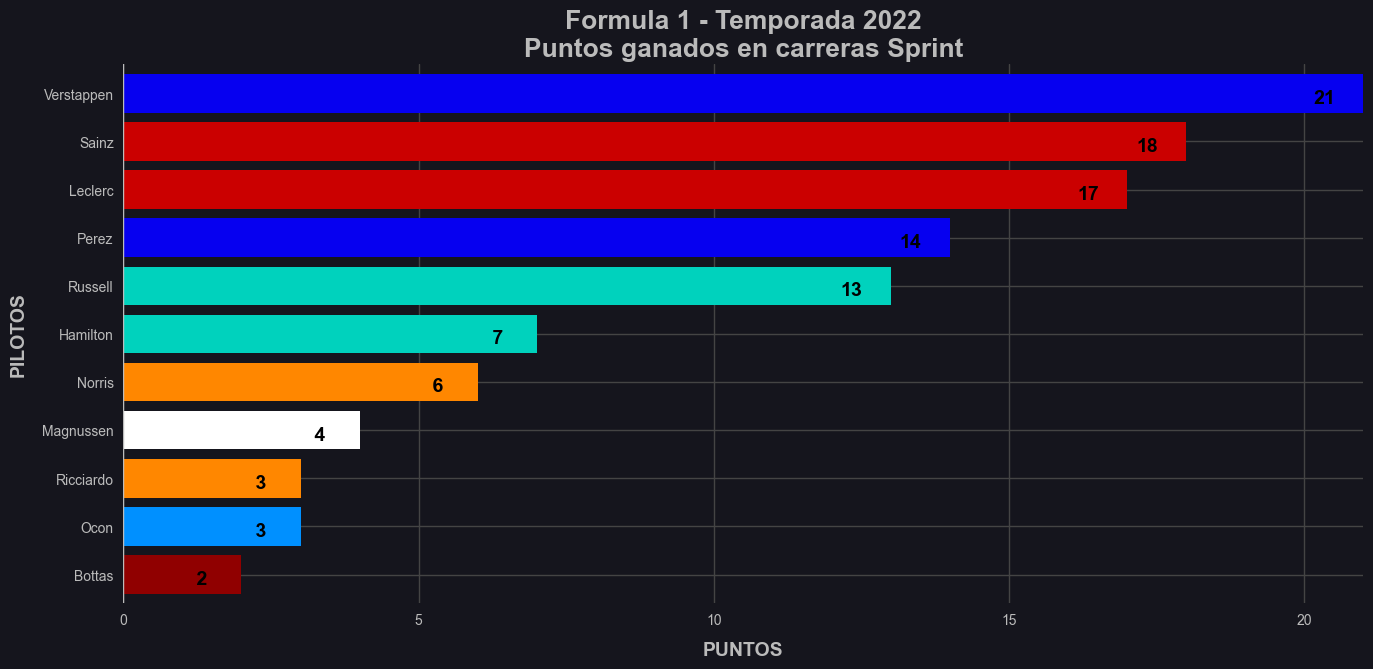

In [72]:
sprintRacePointsNonZero = sprintRacePoints[sprintRacePoints > 0]
plt.figure(figsize=(16,7))
plt.axis([0,21,10.6,-0.6])
c = assign_color('drivers', sprintRacePointsNonZero.index)
plt.barh([driver.split()[1] for driver in sprintRacePointsNonZero.index.values], sprintRacePointsNonZero, color=c)
for i in range(len(sprintRacePointsNonZero)):
    plt.text(sprintRacePointsNonZero[i]-0.85, i+0.2, "{:2}".format(sprintRacePointsNonZero[i]), 
             color='k', fontsize=14, fontweight='bold')
plt.title('Formula 1 - Temporada 2022\nPuntos ganados en carreras Sprint', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('PUNTOS', fontsize=14, fontweight='bold', color='#bbbbbb', labelpad=10)
plt.ylabel('PILOTOS', fontsize=14, fontweight='bold', color='#bbbbbb', labelpad=10)
plt.xticks(range(0,22,5), range(0,22,5), color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

## Mundial de constructores

In [73]:
racePointsTeam = season2022RaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
sprintRacePointsTeam = season2022SprintRaceResults.groupby('Team')['Points'].sum().sort_values(ascending=False)
constructorStandings = (racePointsTeam + sprintRacePointsTeam).fillna(0).sort_values(ascending=False)
constructorStandings = pd.DataFrame(constructorStandings).reset_index()
constructorStandings['POS'] = range(1,11)
constructorStandings.set_index('POS', inplace=True)
constructorStandings

,Team,Points
POS,,
1,Red Bull Racing RBPT,759
2,Ferrari,554
3,Mercedes,515
4,Alpine Renault,173
5,McLaren Mercedes,159
6,Alfa Romeo Ferrari,55
7,Aston Martin Aramco Mercedes,55
8,Haas Ferrari,37
9,AlphaTauri RBPT,35


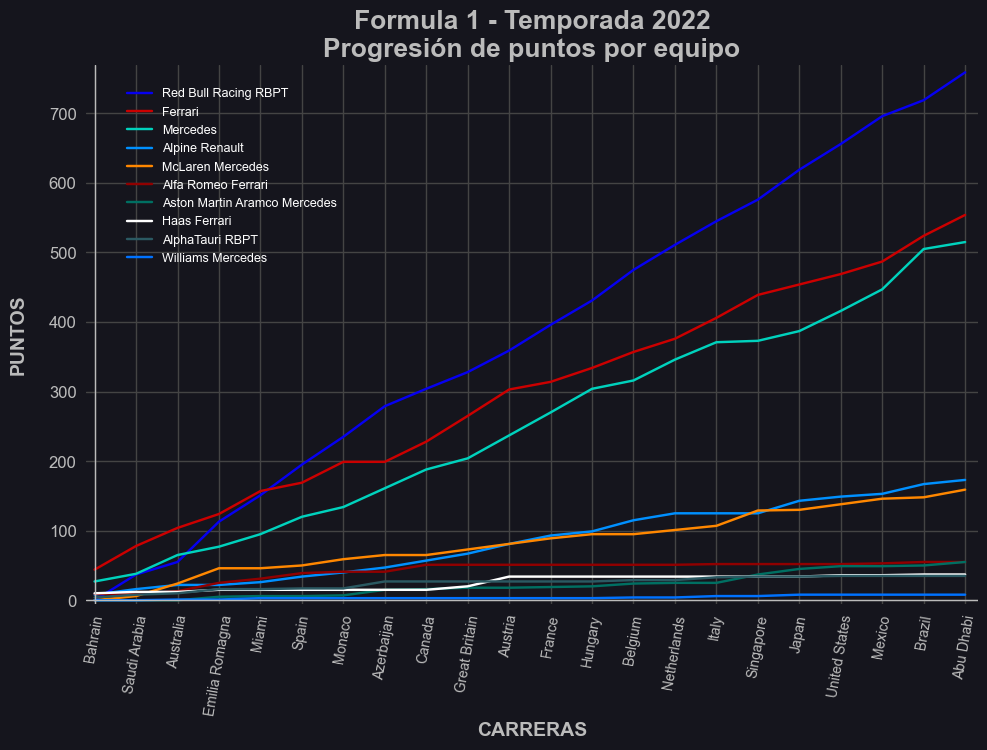

In [74]:
teamNames = constructorStandings['Team'].unique()
teamPoints = {};   teamPointsSprint = {}
trackTeamPtsMerged = season2022RaceResults.groupby(['Track','Team'])['Points'].sum()
trackTeamPtsSprintMerged = season2022SprintRaceResults.groupby(['Track','Team'])['Points'].sum()
for team in teamNames:
    teamPoints[team] = trackTeamPtsMerged[slice(None), team].reindex(tracks).values
    teamPointsSprint[team] = trackTeamPtsSprintMerged[slice(None), team].reindex(tracksSprint).values
sp = [3, 10, 20]
for team in teamNames:
    for i in range(len(sp)):
        teamPoints[team][sp[i]] = teamPoints[team][sp[i]] + teamPointsSprint[team][i]

c = assign_color('teams', teamNames)
plt.figure(figsize=(11.5,7))
plt.axis([-0.2,21.3,-5,770])
for i in range(10):
    plt.plot(teamPoints[teamNames[i]].cumsum(), color=c[i], label=teamNames[i])
plt.title('Formula 1 - Temporada 2022\nProgresión de puntos por equipo', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('CARRERAS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('PUNTOS', fontsize=14, fontweight='bold', color='#bbbbbb', labelpad=15)
plt.xticks(range(0,len(tracks)), tracks, rotation=80, fontsize=10, color='#bbbbbb')
plt.yticks(fontsize=12, color='#bbbbbb')
plt.axvline(0, linewidth=1, color='#bbbbbb')
plt.axhline(0, linewidth=1, color='#bbbbbb')
plt.legend(loc=(0.04,0.62), fontsize=9)
plt.show()

## Ganadores de Grandes Premios

In [75]:
season2022RaceResults[season2022RaceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570
Saudi Arabia,1,Max Verstappen,Red Bull Racing RBPT,4,50,1:24:19.293,25,No,1:31.772
Australia,16,Charles Leclerc,Ferrari,1,58,1:27:46.548,26,Yes,1:20.260
Emilia Romagna,1,Max Verstappen,Red Bull Racing RBPT,1,63,1:32:07.986,26,Yes,1:18.446
Miami,1,Max Verstappen,Red Bull Racing RBPT,3,57,1:34:24.258,26,Yes,1:31.361
Spain,1,Max Verstappen,Red Bull Racing RBPT,2,66,1:37:20.475,25,No,1:25.456
Monaco,11,Sergio Perez,Red Bull Racing RBPT,3,64,1:56:30.265,25,No,1:16.028
Azerbaijan,1,Max Verstappen,Red Bull Racing RBPT,3,51,1:34:05.941,25,No,1:46.050
Canada,1,Max Verstappen,Red Bull Racing RBPT,1,70,1:36:21.757,25,No,1:15.839


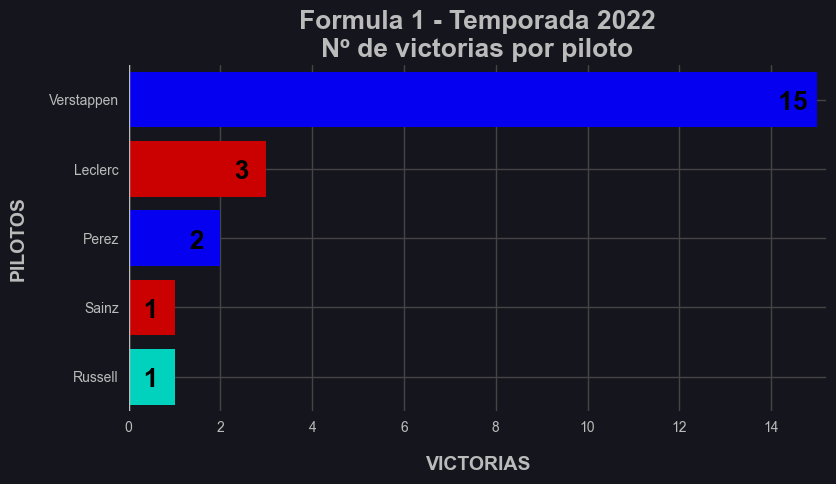

In [76]:
winners = season2022RaceResults[season2022RaceResults['Position'] == '1']['Driver'].value_counts()
c = assign_color('drivers', winners.index)
plt.figure(figsize=(9,4.5))
plt.axis([0,15.2,4.5,-0.5])
plt.barh([driver.split()[1] for driver in winners.index], winners, color=c)
for i in range(len(winners)):
    plt.text(winners[i]-1, i+0.15, "{:>3}".format(winners[i]), fontsize=19, fontweight='bold', color='k')
plt.title('Formula 1 - Temporada 2022\nNº de victorias por piloto', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('VICTORIAS', fontsize=14, fontweight='bold', color='#bbbbbb', labelpad=15)
plt.ylabel('PILOTOS', fontsize=14, fontweight='bold', color='#bbbbbb', labelpad=15)
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

## Pole Positions

In [77]:
season2022PolePos = season2022RaceResults[season2022RaceResults['Starting Grid'] == 1].set_index('Track') \
    .drop('Starting Grid', axis=1)
polePos = {}
for driver in season2022PolePos['Driver']:
    if driver not in polePos:   polePos[driver] = 1
    else:   polePos[driver] += 1
season2022PolePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,1,16,Charles Leclerc,Ferrari,57,1:37:33.584,26,Yes,1:34.570
Saudi Arabia,4,11,Sergio Perez,Red Bull Racing RBPT,50,+10.800,12,No,1:32.042
Australia,1,16,Charles Leclerc,Ferrari,58,1:27:46.548,26,Yes,1:20.260
Emilia Romagna,1,1,Max Verstappen,Red Bull Racing RBPT,63,1:32:07.986,26,Yes,1:18.446
Miami,2,16,Charles Leclerc,Ferrari,57,+3.786,18,No,1:31.488
Spain,NC,16,Charles Leclerc,Ferrari,27,DNF,0,No,1:27.030
Monaco,4,16,Charles Leclerc,Ferrari,64,+2.922,12,No,1:16.249
Azerbaijan,NC,16,Charles Leclerc,Ferrari,21,DNF,0,No,1:47.531
Canada,1,1,Max Verstappen,Red Bull Racing RBPT,70,1:36:21.757,25,No,1:15.839


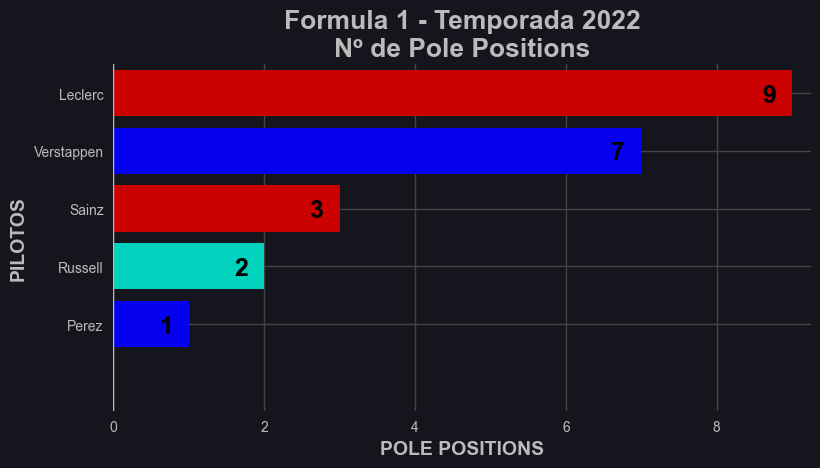

In [78]:
polePositions = pd.Series(polePos).sort_values(ascending=False)
c = assign_color('drivers', polePositions.index)
plt.figure(figsize=(9,4.5))
plt.axis([0,9.25,5.5,-0.5])
plt.barh([driver.split()[1] for driver in polePositions.index], polePositions, color=c)
plt.title('Formula 1 - Temporada 2022\nNº de Pole Positions', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(polePositions)):
    plt.text(polePositions[i]-0.4, i+0.15, polePositions[i], fontsize=18, fontweight='bold', color='k')
plt.xlabel('POLE POSITIONS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('PILOTOS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

## Podios

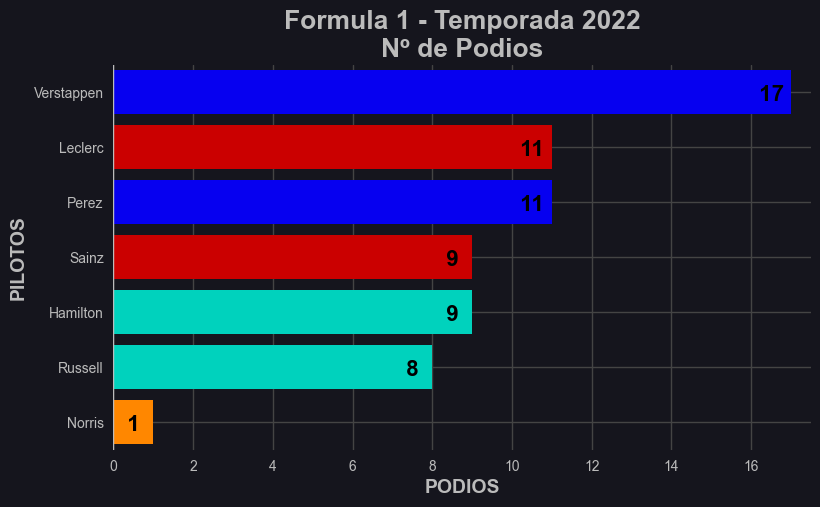

In [79]:
podiumFinishes = season2022RaceResults[season2022RaceResults['Position'].isin(['1','2','3'])]['Driver'].value_counts()
c = assign_color('drivers', podiumFinishes.index)
plt.figure(figsize=(9,5))
plt.axis([0,17.5,6.5,-0.5])
plt.barh([driver.split()[1] for driver in podiumFinishes.index], podiumFinishes, color=c)
for i in range(len(podiumFinishes)):
    plt.text(podiumFinishes[i]-0.95, i+0.15, "{:>3}".format(podiumFinishes[i]), fontsize=16, fontweight='bold', color='k')
plt.title('Formula 1 - Temporada 2022\nNº de Podios', fontsize=19, weight='bold', color='#bbbbbb')
plt.xlabel('PODIOS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('PILOTOS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb')
plt.axvline(0, color='#bbbbbb')
plt.show()

## Nº de veces Top 10

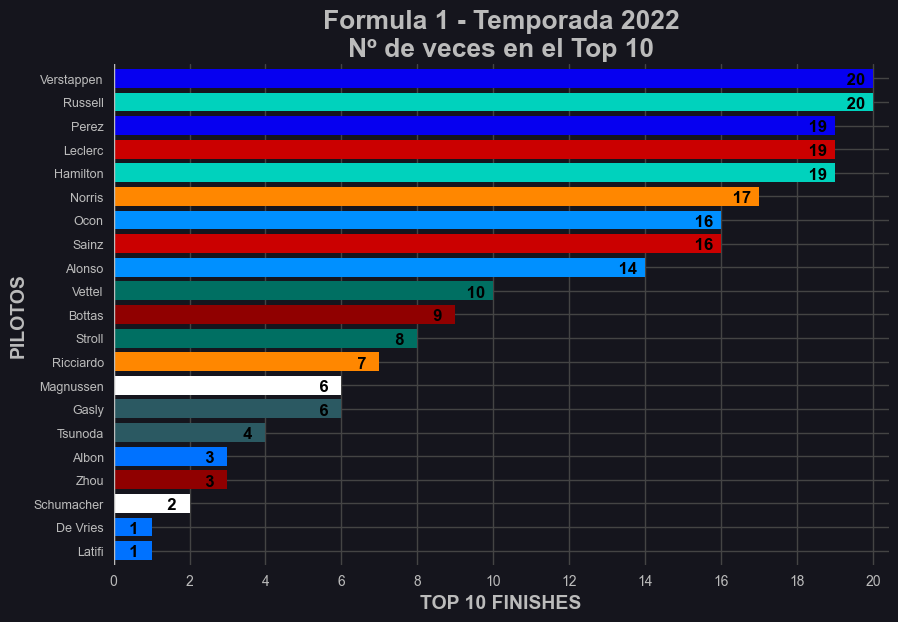

In [80]:
top10Finishes = season2022RaceResults[season2022RaceResults['Position'].isin([str(i) for i in range(1,11)])] \
                ['Driver'].value_counts()
c = assign_color('drivers', top10Finishes.index)
plt.figure(figsize=(10,6.5))
plt.axis([0,20.4,20.6,-0.6])
plt.barh([" ".join(driver.split()[1:]) for driver in top10Finishes.index], top10Finishes, color=c)
for i in range(len(top10Finishes)):
    plt.text(top10Finishes[i]-0.83, i+0.25, "{:>3}".format(top10Finishes[i]), fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - Temporada 2022\nNº de veces en el Top 10', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('PILOTOS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(range(0,22,2), range(0,22,2), color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

## Análisis de DNF

### Por Piloto

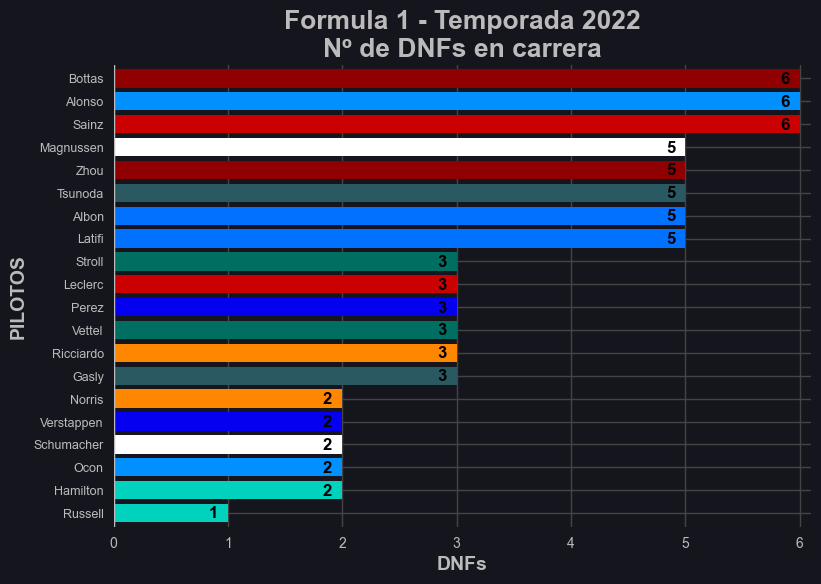

In [81]:
DNFdriver = season2022RaceResults[season2022RaceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color('drivers', DNFdriver.index)
plt.figure(figsize=(9,6))
plt.axis([0,6.1,19.6,-0.6])
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver, color=c)
for i in range(len(DNFdriver)):
    plt.text(DNFdriver[i]-0.17, i+0.22, DNFdriver[i], fontsize=12, fontweight='bold', color='k')
plt.title('Formula 1 - Temporada 2022\nNº de DNFs en carrera', fontsize=19, fontweight='bold', color='#bbbbbb')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('PILOTOS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()



### Por Carrera

DNFtrack = season2022RaceResults[season2022RaceResults['Time/Retired'] == 'DNF']['Track'].value_counts()
plt.figure(figsize=(9,6))
plt.axis([0,6.1,21.6,-0.6])
plt.barh(DNFtrack.index, DNFtrack, color='#6abeca')
plt.title('Formula 1 - Temporada 2022\nNº de DNFs por circuito', fontsize=19, fontweight='bold', color='#bbbbbb')
for i in range(len(DNFtrack)):
    plt.text(DNFtrack[i]-0.18, i+0.22, DNFtrack[i], fontsize=12, fontweight='bold', color='k')
plt.xlabel('DNFs', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.ylabel('CIRCUITOS', fontsize=14, fontweight='bold', color='#bbbbbb')
plt.xticks(color='#bbbbbb')
plt.yticks(color='#bbbbbb', fontsize=9)
plt.axvline(0, color='#bbbbbb')
plt.show()

## Relación entre poles y victorias

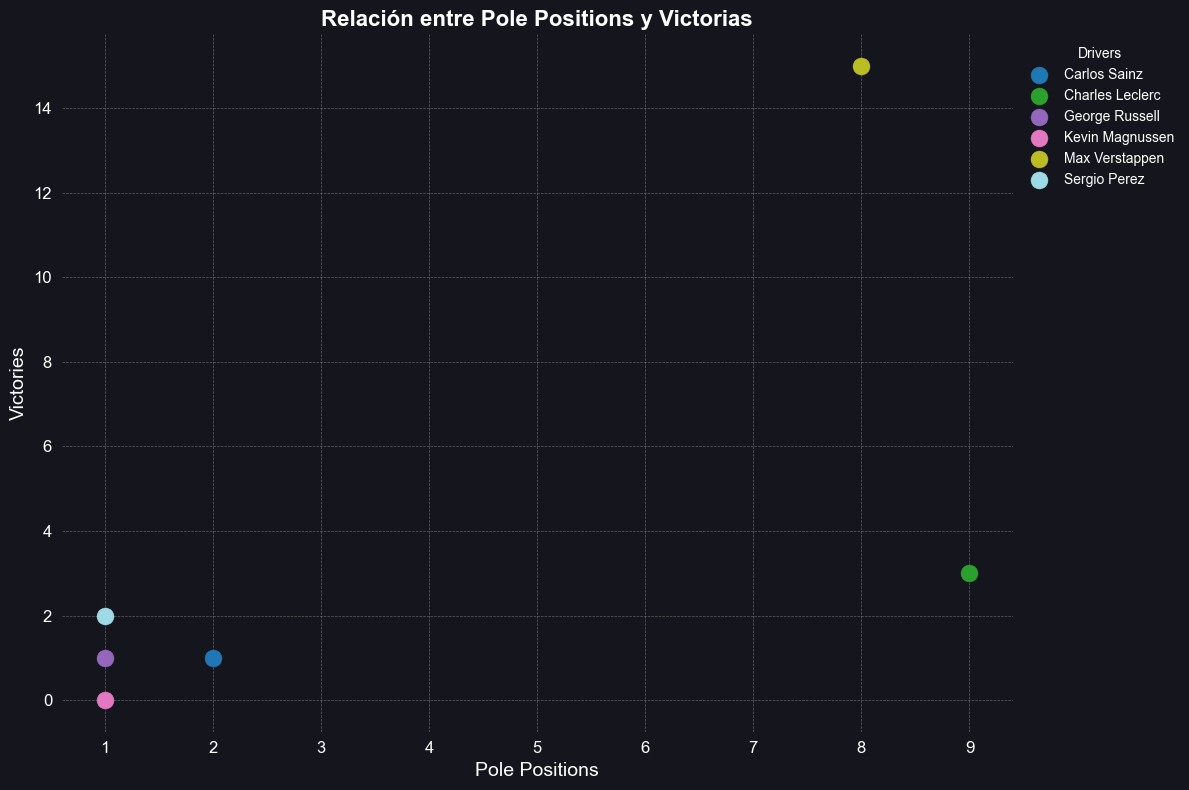

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Cargar los archivos CSV
qualifying_results = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\Formula1_2022season_qualifyingResults.csv')
race_results = pd.read_csv('C:\\Users\\marie\\Desktop\\F1_EDA\\csv\\Formula1_2022season_raceResults.csv')

# Convertir las columnas 'Position' a numérico, ignorando valores no válidos
qualifying_results['Position'] = pd.to_numeric(qualifying_results['Position'], errors='coerce')
race_results['Position'] = pd.to_numeric(race_results['Position'], errors='coerce')

# Filtrar las pole positions y victorias
poles = qualifying_results[qualifying_results['Position'] == 1].groupby('Driver').size()
victories = race_results[race_results['Position'] == 1].groupby('Driver').size()

# Crear un DataFrame combinando pole positions y victorias
combined_data = pd.DataFrame({
    'Pole Positions': poles,
    'Victories': victories
}).fillna(0).astype(int)

# Asignar colores únicos a cada piloto
drivers = combined_data.index
colors = cm.tab20(np.linspace(0, 1, len(drivers)))  # Usar una paleta de colores
color_map = dict(zip(drivers, colors))

# Generar la gráfica
plt.figure(figsize=(12, 8))
for driver, row in combined_data.iterrows():
    plt.scatter(row['Pole Positions'], row['Victories'], 
                color=color_map[driver], label=driver, s=150)

# Configurar la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Drivers", fontsize=10)

# Etiquetas y diseño
plt.title('Relación entre Pole Positions y Victorias', fontsize=16, weight='bold')
plt.xlabel('Pole Positions', fontsize=14)
plt.ylabel('Victories', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## Relación entre el Nº de DNF en cada circuito y el Nº de vueltas

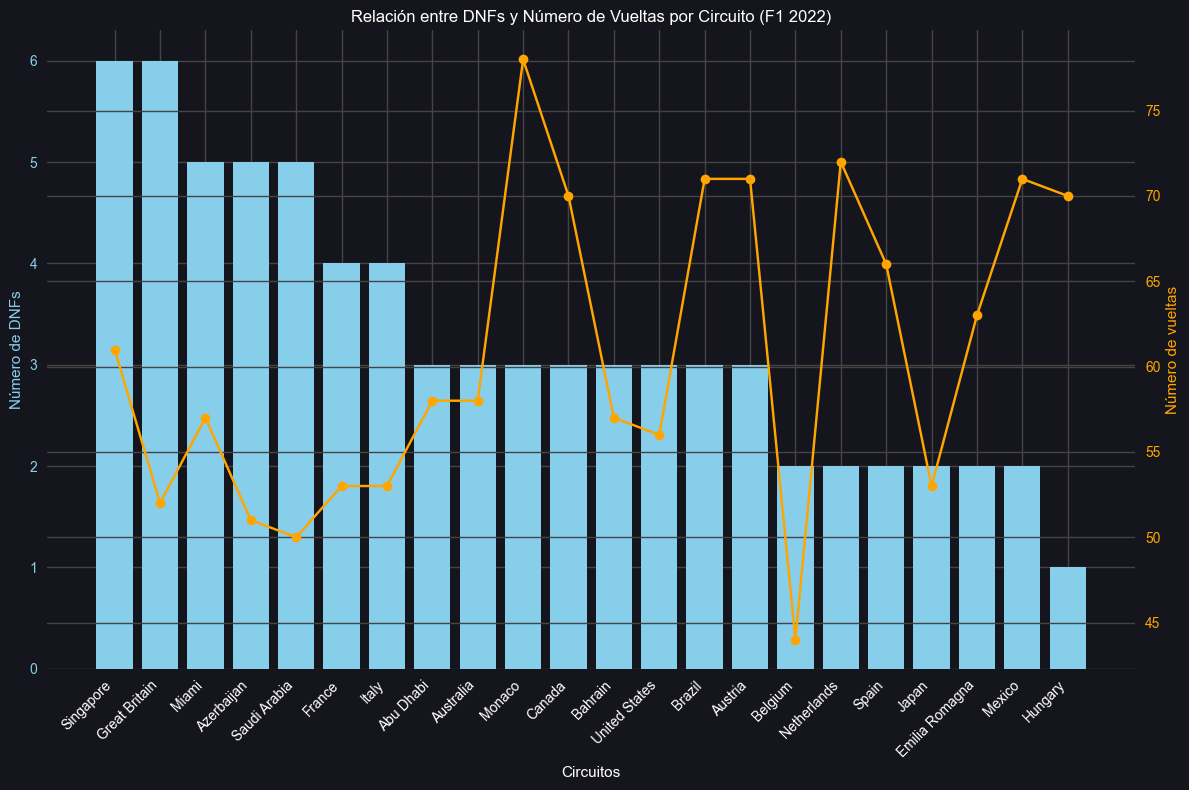

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos de DNFs por circuito (extraídos de la imagen izquierda)
dnf_data = {
    "Circuit": [
        "Singapore", "Great Britain", "Miami", "Azerbaijan", "Saudi Arabia", 
        "France", "Italy", "Austria", "Brazil", "United States", "Bahrain", 
        "Canada", "Monaco", "Australia", "Abu Dhabi", "Belgium", "Netherlands", 
        "Spain", "Japan", "Emilia Romagna", "Mexico", "Hungary"
    ],
    "DNFs": [
        6, 6, 5, 5, 5, 
        4, 4, 3, 3, 3, 
        3, 3, 3, 3, 3, 
        2, 2, 2, 2, 2, 
        2, 1
    ]
}

# Datos de vueltas por circuito (de la tabla proporcionada por el usuario)
laps_data = {
    "Circuit": [
        "Bahrain", "Saudi Arabia", "Australia", "Emilia Romagna", "Miami",
        "Spain", "Monaco", "Azerbaijan", "Canada", "Great Britain", 
        "Austria", "France", "Hungary", "Belgium", "Netherlands", 
        "Italy", "Singapore", "Japan", "United States", "Mexico", 
        "Brazil", "Abu Dhabi"
    ],
    "Laps": [
        57, 50, 58, 63, 57, 
        66, 78, 51, 70, 52, 
        71, 53, 70, 44, 72, 
        53, 61, 53, 56, 71, 
        71, 58
    ]
}

# Crear DataFrames para combinar los datos
df_dnf = pd.DataFrame(dnf_data)
df_laps = pd.DataFrame(laps_data)

# Unir ambos DataFrames por el nombre del circuito
df_combined = pd.merge(df_dnf, df_laps, on="Circuit")

# Ordenar los datos para facilitar la visualización
df_combined.sort_values(by="DNFs", ascending=False, inplace=True)

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para DNFs
ax1.bar(df_combined["Circuit"], df_combined["DNFs"], color="skyblue", label="DNFs")
ax1.set_xlabel("Circuitos")
ax1.set_ylabel("Número de DNFs", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_xticklabels(df_combined["Circuit"], rotation=45, ha="right")

# Gráfico de línea para número de vueltas
ax2 = ax1.twinx()
ax2.plot(df_combined["Circuit"], df_combined["Laps"], color="orange", marker="o", label="Vueltas")
ax2.set_ylabel("Número de vueltas", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Títulos y leyendas
plt.title("Relación entre DNFs y Número de Vueltas por Circuito (F1 2022)")
fig.tight_layout()
plt.show()
